In [1]:

import numpy as np
import matplotlib.pyplot as plt
import blip_analysis as ba
import exp_blip_models as ebm
import numpy as np
from scipy.stats import ttest_ind
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from scipy.stats import poisson
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from label_axes import label_axes
import json
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

b


In [2]:
glyphs = ba.get_glyphs()
style_params = json.load(open('../Data/style_params.json', 'r'))
conc_models1 = pickle.Unpickler(open('../Data/230320_conc_models1.pkl', 'rb')).load()
conc_models2 = pickle.Unpickler(open('../Data/230320_conc_models2.pkl', 'rb')).load()
conc_models3 = pickle.Unpickler(open('../Data/230320_conc_models3.pkl', 'rb')).load()
onset_models1 = pickle.Unpickler(open('../Data/230320_onset_models1.pkl', 'rb')).load()
onset_models2 = pickle.Unpickler(open('../Data/230320_onset_models2.pkl', 'rb')).load()
onset_models3 = pickle.Unpickler(open('../Data/230320_onset_models3.pkl', 'rb')).load()
cao_models1 = pickle.Unpickler(open('../Data/230320_cao_models1.pkl', 'rb')).load()
cao_models2 = pickle.Unpickler(open('../Data/230320_cao_models2.pkl', 'rb')).load()
cao_models3 = pickle.Unpickler(open('../Data/230320_cao_models3.pkl', 'rb')).load()
diff_models1 = pickle.Unpickler(open('../Data/230320_diff_models1.pkl', 'rb')).load()
diff_models2 = pickle.Unpickler(open('../Data/230320_diff_models2.pkl', 'rb')).load()
diff_models3 = pickle.Unpickler(open('../Data/230320_diff_models3.pkl', 'rb')).load()
base_models1 = pickle.Unpickler(open('../Data/230320_base_models1.pkl', 'rb')).load()
base_models2 = pickle.Unpickler(open('../Data/230320_base_models2.pkl', 'rb')).load()
base_models3 = pickle.Unpickler(open('../Data/230320_base_models3.pkl', 'rb')).load()

In [3]:
data_joined = np.load('../Data/230612_data_joined.npy')
#cms = [confusion_matrix(data[i, :, 1].reshape(-1), data[i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms1 = [confusion_matrix(data_joined[0, i, :, 1].reshape(-1), data_joined[0, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms2 = [confusion_matrix(data_joined[1, i, :, 1].reshape(-1), data_joined[1, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms3 = [confusion_matrix(data_joined[2, i, :, 1].reshape(-1), data_joined[2, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc1 = [confusion_matrix(data_joined[4, i, :, 1].reshape(-1), data_joined[4, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset1 = [confusion_matrix(data_joined[3, i, :, 1].reshape(-1), data_joined[3, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined1 = [confusion_matrix(data_joined[5, i, :, 1].reshape(-1), data_joined[5, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc2 = [confusion_matrix(data_joined[6, i, :, 1].reshape(-1), data_joined[6, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset2 = [confusion_matrix(data_joined[7, i, :, 1].reshape(-1), data_joined[7, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined2 = [confusion_matrix(data_joined[8, i, :, 1].reshape(-1), data_joined[8, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc3 = [confusion_matrix(data_joined[9, i, :, 1].reshape(-1), data_joined[9, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset3 = [confusion_matrix(data_joined[10, i, :, 1].reshape(-1), data_joined[10, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined3 = [confusion_matrix(data_joined[11, i, :, 1].reshape(-1), data_joined[11, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
true_classifiers = pickle.Unpickler(open('../Fig3/../Fig3/230315_full_classifier_RFs.pkl', 'rb')).load()
preds = true_classifiers[:, :, 1]
preds = np.array([np.hstack(i) for i in preds])
trues = [i for j in range(100) for i in range(32)]
cm_true1 = confusion_matrix(trues, preds[0], labels=range(32), normalize='true')
cm_true2 = confusion_matrix(trues, preds[1], labels=range(32), normalize='true')
cm_true3 = confusion_matrix(trues, preds[2], labels=range(32), normalize='true')


In [4]:
def plot_difference_distributions(ax, conc_models, onset_models, color=['r', 'b']):
    ''' Plot the difference in test scores between the two models for each cell.
    not being used now but needed for the sorted arg in the next function'''
    conc_test_scores = np.array([i.test_scores.mean(axis=-1) for i in conc_models])
    onset_test_scores = np.array([i.test_scores.mean(axis=-1) for i in onset_models])
    diffs = np.array(conc_test_scores - onset_test_scores)
    sorted_arg = np.argsort(diffs.mean(axis=-1))
    ax.errorbar(range(130), diffs.mean(axis=-1)[sorted_arg], yerr=diffs.std(axis=-1)[sorted_arg], fmt='.', color='k',  markersize=0, elinewidth=0.5)
    conc_best, onset_best, colors = find_best_fits(conc_models, onset_models, colors_base=color+['gray'])
    ax.scatter(range(130), diffs.mean(axis=-1)[sorted_arg], c=np.array(colors)[sorted_arg], s=3, zorder=10)
    print(len(conc_best), len(onset_best))
    return sorted_arg

def find_best_fits(conc_models, onset_models, colors_base=['r', 'b', 'gray']):
    ''' Find the cells that are significantly better fit by the conc model or the onset model.'''
    ttests = []
    ttests_conc = []
    ttests_onset = []
    colors = []
    conc_scores = np.array([i.test_scores.mean(axis=-1) for i in conc_models])
    onset_scores = np.array([i.test_scores.mean(axis=-1) for i in onset_models])
    
    for i in range(130):
        ttest = ttest_ind(conc_scores[i], onset_scores[i], equal_var=False)[1]*130
        ttests.append(ttest)
        if ttest < 0.05 and np.mean(conc_scores[i]) < np.mean(onset_scores[i]):
            ttests_conc.append(i)
            colors.append(colors_base[0])
        elif ttest < 0.05 and np.mean(conc_scores[i]) > np.mean(onset_scores[i]):
            ttests_onset.append(i)
            colors.append(colors_base[1])
        else:
            colors.append(colors_base[2])
    return ttests_conc, ttests_onset, colors

def plot_split_models_response(ax1, ax2, model1, model2, isi=1, colors=None, fontsize=8, legend=True, labels=None):
    ''' Plot the response of two models to the same cell used in part B and C of the figure.'''
    if colors is None:
        colors = ['k', 'C0', 'C1']
    ax1.errorbar(np.arange(0, 32*isi, isi), model1.X_test_avg.mean(axis=0), yerr=(model1.X_test_avg.mean(axis=0) - model1.X_test_avg.min(axis=0), model1.X_test_avg.max(axis=0) - model1.X_test_avg.mean(axis=0)),fmt='.', color=colors[0],  markersize=0, elinewidth=0.5)
    ax1.scatter(np.arange(0, 32*isi, isi), model1.X_test_avg.mean(axis=0), color=colors[0], s=3, zorder=10)
    ax1.errorbar(np.arange(0, 32*isi, isi), model1.pred_test_avg.mean(axis=0), yerr=(model1.pred_test_avg.mean(axis=0) - model1.pred_test_avg.min(axis=0), model1.pred_test_avg.max(axis=0) - model1.pred_test_avg.mean(axis=0)), fmt='.', color=colors[1],  markersize=0, elinewidth=0.5)
    ax1.scatter(np.arange(0, 32*isi, isi), model1.pred_test_avg.mean(axis=0), color=colors[1], s=3, zorder=10)

    ax2.errorbar(np.arange(0, 32*isi, isi), model2.X_test_avg.mean(axis=0), yerr=(model2.X_test_avg.mean(axis=0) - model2.X_test_avg.min(axis=0), model2.X_test_avg.max(axis=0) - model2.X_test_avg.mean(axis=0)),fmt='.', color=colors[0],  markersize=0, elinewidth=0.5)
    ax2.scatter(np.arange(0, 32*isi, isi), model2.X_test_avg.mean(axis=0), color=colors[0], s=3, zorder=10)
    ax2.errorbar(np.arange(0, 32*isi, isi), model2.pred_test_avg.mean(axis=0), yerr=(model2.pred_test_avg.mean(axis=0) - model2.pred_test_avg.min(axis=0), model2.pred_test_avg.max(axis=0) - model2.pred_test_avg.mean(axis=0)), fmt='.', color=colors[2],  markersize=0, elinewidth=0.5)
    ax2.scatter(np.arange(0, 32*isi, isi), model2.pred_test_avg.mean(axis=0), color=colors[2], s=3, zorder=10)

    x_ticks = np.arange(0, 32*isi, isi)
    ax1.set_xticks(x_ticks);
    ax1.set_xticklabels(glyphs, rotation=90, fontsize=fontsize);
    ax2.set_xticks(x_ticks);
    ax2.set_xticklabels(glyphs, rotation=90, fontsize=fontsize);
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_yticklabels([])
    [ax2.scatter([], [], color=colors[i], s=3, label=labels[i]) for i in range(len(colors))]
    
    if legend:
        ax2.legend()


def plot_best_cm(ax, cms, true_cm, fontsize=8, show_xticks=True, show_yticks=True, colorbar=True):
    ''' Plot the confusion matrix with the highest correlation to the true matrix'''
    best_idx = np.argmax([np.corrcoef(i.flatten(), true_cm.flatten())[0, 1] for i in cms])
    print(best_idx)
    
    im = ax.imshow(cms[best_idx], cmap='plasma', vmin=0)
    
    ax.set_xticks(range(32))
    ax.set_yticks(range(32))
    if show_xticks:
        ax.set_xticklabels(glyphs, rotation=90, fontsize=fontsize)
    else:
        ax.set_xticklabels([])
    if show_yticks:
        ax.set_yticklabels(glyphs, fontsize=fontsize)
    else:
        ax.set_yticklabels([])
    ax.set_ylim(31.5, -0.5)
    if colorbar:
        cbar = plt.colorbar(mappable=im, ax=ax)
        return im, np.max(cms[best_idx]), cbar
    else:
        return im, np.max(cms[best_idx])

def plot_correlations(true_corrs, diff_corrs, conc_corrs, onset_corrs, joined_corrs, identiy, colors, ax=None):
    ''' Plot the correlations between the true and predicted confusion matrices for the different models'''

    if ax is None:
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111)
    markers = style_params['odour_markers']
    odour_labels = style_params['odour_labels']
    facecolors = [mpl.colors.to_rgba(i, alpha=0.5) for i in colors]
    scatter = ax.scatter(range(6), [true_corrs[0], diff_corrs[0], conc_corrs[0], onset_corrs[0], joined_corrs[0], identiy[0]], marker=markers[0], label=odour_labels[0], facecolors=facecolors, edgecolors=colors)
    ax.scatter(range(6), [true_corrs[1], diff_corrs[1], conc_corrs[1], onset_corrs[1], joined_corrs[1], identiy[1]], marker=markers[1], label=odour_labels[1], facecolors=facecolors, edgecolors=colors)
    ax.scatter(range(6), [true_corrs[2], diff_corrs[2], conc_corrs[2], onset_corrs[2], joined_corrs[2], identiy[2]], marker=markers[2], label=odour_labels[2], facecolors=facecolors, edgecolors=colors)

    # ax.plot([0, 0], [np.min(true_corrs), np.max(true_corrs)], color='k', linestyle='--', zorder=-10)
    # ax.plot([1, 1], [np.min(diff_corrs), np.max(diff_corrs)], color='k', linestyle='--', zorder=-10)
    # ax.plot([2, 2], [np.min(conc_corrs), np.max(conc_corrs)], color='k', linestyle='--', zorder=-10)
    # ax.plot([3, 3], [np.min(onset_corrs), np.max(onset_corrs)], color='k', linestyle='--', zorder=-10)
    # ax.plot([4, 4], [np.min(joined_corrs), np.max(joined_corrs)], color='k', linestyle='--', zorder=-10)
    # ax.plot([5, 5], [np.min(identiy), np.max(identiy)], color='k', linestyle='--', zorder=-10)

    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(range(6))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel('Correlation coefficient')

20 61


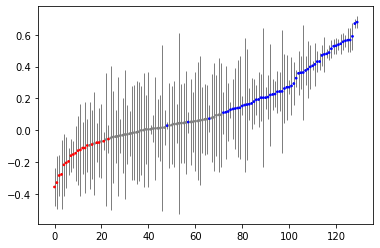

In [5]:
fig, ax = plt.subplots(1, 1)
conc_vs_onset_args = plot_difference_distributions(ax, conc_models1, onset_models1)


In [6]:
def plot_single_model_fit(ax, model, show_x_labels=False, model_index=[0, 1], ):         
    ax.errorbar(np.arange(0, 32*isi, isi), model.X_test_avg.mean(axis=0), yerr=(model.X_test_avg.mean(axis=0) - model.X_test_avg.min(axis=0), model.X_test_avg.max(axis=0) - model.X_test_avg.mean(axis=0)),fmt='.', color=colors[model_index[0]],  markersize=0, elinewidth=line_thickness)
    ax.scatter(np.arange(0, 32*isi, isi), model.X_test_avg.mean(axis=0), color=colors[model_index[0]], s=s, zorder=10, marker=marker, label=labels[model_index[0]])
    ax.errorbar(np.arange(0+sep, sep+32*isi, isi), model.pred_test_avg.mean(axis=0), yerr=(model.pred_test_avg.mean(axis=0) - model.pred_test_avg.min(axis=0), model.pred_test_avg.max(axis=0) - model.pred_test_avg.mean(axis=0)), fmt='.', color=colors[model_index[1]],  markersize=0, elinewidth=line_thickness)
    ax.scatter(np.arange(sep+0, sep+32*isi, isi), model.pred_test_avg.mean(axis=0), color=colors[model_index[1]], s=s, zorder=10, marker=marker, label=labels[model_index[1]])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks(np.arange(0+sep/2, sep/2+32*isi, isi))
    if show_x_labels:
        ax.set_xticklabels(glyphs, rotation=90)
    else:
        ax.set_xticklabels([])
    ax.set_xlim(-1, 32*isi)

15
12
17


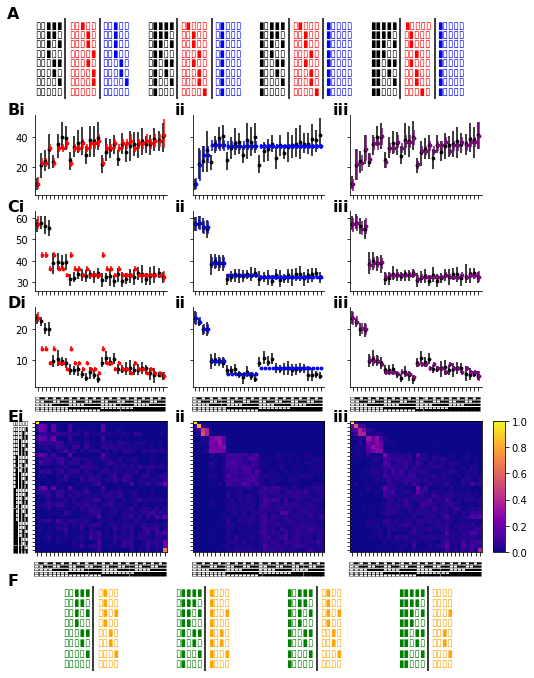

In [25]:
style_params = json.load(open('../Data/style_params.json', 'r'))
cao_array = ebm.trial_arrays['cao_array']
diff_array = ebm.trial_arrays['diff_array']

isi=2
sep=0.5
s = 8
marker='o'
line_thickness=1.5
order = ['true', 'diff', 'CAO', 'conc', 'onset', 'base']
labels = [style_params['model_labels'][i] for i in order]
labels = labels[:-1] + ['Identity'] + [labels[-1]]
colors = [style_params['model_colors'][i] for i in order] 
colors = colors[:-1] + ['magenta'] + [colors[-1]]
label_axes_fs = style_params['label_axes_font_size']
label_axes_font_weight = style_params['label_axes_font_weight']
fig = plt.figure(figsize=(8, 12))
super_gs = fig.add_gridspec(12, 3, hspace=1)
gs = super_gs[:7, :].subgridspec(4, 3)
conc_axs = [fig.add_subplot(gs[1, i]) for i in range(3)]
ui = 55
plot_single_model_fit(conc_axs[0], conc_models1[ui], show_x_labels=False, model_index=[0, 3])
plot_single_model_fit(conc_axs[1], onset_models1[ui], show_x_labels=False, model_index=[0, 4])
plot_single_model_fit(conc_axs[2], cao_models1[ui], show_x_labels=False, model_index=[0, 2])
ylims = [i.get_ylim() for i in conc_axs]
ylim = [np.min(ylims), np.max(ylims)]
[conc_axs[i].set_ylim(ylim) for i in range(3)]

onset_axs = [fig.add_subplot(gs[2, i]) for i in range(3)]
ui = 75
plot_single_model_fit(onset_axs[0], conc_models1[ui], show_x_labels=False, model_index=[0, 3])
plot_single_model_fit(onset_axs[1], onset_models1[ui], show_x_labels=False, model_index=[0, 4])
plot_single_model_fit(onset_axs[2], cao_models1[ui], show_x_labels=False, model_index=[0, 2])
ylims = [i.get_ylim() for i in onset_axs]
ylim = [np.min(ylims), np.max(ylims)]
[onset_axs[i].set_ylim(ylim) for i in range(3)]

cao_axs = [fig.add_subplot(gs[3, i]) for i in range(3)]
ui = 90
plot_single_model_fit(cao_axs[0], conc_models1[ui], show_x_labels=True, model_index=[0, 3])
plot_single_model_fit(cao_axs[1], onset_models1[ui], show_x_labels=True, model_index=[0, 4])
plot_single_model_fit(cao_axs[2], cao_models1[ui], show_x_labels=True, model_index=[0, 2])
ylims = [i.get_ylim() for i in cao_axs]
ylim = [np.min(ylims), np.max(ylims)]
[cao_axs[i].set_ylim(ylim) for i in range(3)]

[i.set_yticklabels([]) for axs in [conc_axs, onset_axs, cao_axs] for i in axs[1:]]
[i.set_xticklabels(glyphs, rotation=90, fontsize=6) for i in cao_axs]

#plot_single_model_fit(axs[3], diff_models1[ui], show_x_labels=True, model_index=[0, 1])
text_ax = fig.add_subplot(gs[0, :], frameon=False)
text_ax.set_xticks([])
text_ax.set_yticks([])
for i in range(32):
    cao_string = ''.join(['▯▮'[j] for j in cao_array[i].astype(int)])
    text_ax.text(0+int(i/8), 0+i%8, f'{glyphs[i]}')
    text_ax.text(0.3+int(i/8), 0+i%8, f'{cao_string[5:][::-1]}', color='r')
    text_ax.text(0.6+int(i/8), 0+i%8, f'{cao_string[:5]}', color='b')
text_ax.set_xlim(0, 4)
text_ax.set_ylim(-0.5, 8)
for i in range(4):
    text_ax.axvline(0.27+i, color='k')
    text_ax.axvline(0.58+i, color='k')

cm_ax1 = fig.add_subplot(super_gs[7:10, 0])
cm_ax2 = fig.add_subplot(super_gs[7:10, 1])
cm_ax3 = fig.add_subplot(super_gs[7:10, 2])

fs = 6

im1, vmax1 = plot_best_cm(cm_ax1, cms_conc1, cm_true1, show_yticks=True, show_xticks=True, colorbar=False, fontsize=fs)
im2, vmax2 = plot_best_cm(cm_ax2, cms_onset1, cm_true1, show_yticks=False, colorbar=False, fontsize=fs)
im3, vmax3 = plot_best_cm(cm_ax3, cms_joined1, cm_true1, show_yticks=False, colorbar=False, fontsize=fs)
vmax = np.max([vmax1, vmax2, vmax3])
[im.set_clim(0, vmax) for im in [im1, im2, im3]]
cm_pos = cm_ax3.get_position()
cbar_ax = fig.add_axes([0.92, cm_pos.y0, 0.02, cm_pos.height])
cbar = plt.colorbar(im3, cax=cbar_ax)

diff_ax = fig.add_subplot(super_gs[10:, :], frameon=False)
diff_ax.set_xticks([])
diff_ax.set_yticks([])
diff_ax.set_xticks([])
diff_ax.set_yticks([])
for i in range(32):
    diff_string = ''.join(['▯▮'[j] for j in diff_array[i].astype(int)])
    diff_ax.text(0.0+int(i/8), 0+i%8, f'{diff_string[:5]}', color='green')
    diff_ax.text(0.3+int(i/8), 0+i%8, f'{diff_string[5:]}', color='orange')
diff_ax.set_xlim(-0.25, 3.75)
diff_ax.set_ylim(-0.5, 8)
for i in range(4):
    diff_ax.axvline(0.27+i, color='k')


axes = [text_ax, *conc_axs, *onset_axs, *cao_axs, cm_ax1, cm_ax2, cm_ax3, diff_ax]
labels = ['A', 'Bi', 'ii', 'iii', 'Ci', 'ii', 'iii', 'Di', 'ii', 'iii', 'Ei', 'ii', 'iii', "F"]
align_x = [[0, 1, 4, 7, 10, 13], [2, 5, 8, 11], [3, 6, 9, 12]]
align_y = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
dx = [-0.025 for i in range(14)]
label_axes.label_axes(axes, labels, align_x=align_x, align_y=align_y, fontsize=16, fontweight='bold', dx=dx)
plt.savefig('230913_Sup41.pdf', bbox_inches='tight')

In [ ]:
text_ax.text(0+int(i/8), 0+i%8, f'{glyphs[i]}  \033[1;31m{cao_string[:5]}\033[0m  \033[1;34m{cao_string[5:][::-1]}\033[0m')

In [72]:
glyph_off = glyphs[0][0]
glyph_on = glyphs[-1][1]
print(glyph_off, glyph_on)

▯ ▮


In [8]:
cao_array = ebm.trial_arrays['cao_array']

In [83]:
select_trials = [2, 12, 21, 31, ]
for i in select_trials:
    cao_string = ''.join(['▯▮'[j] for j in cao_array[i].astype(int)])
    print(glyphs[i], cao_string[:5], cao_string[5:])

▯▯▯▮▯ ▯▯▯▮▯ ▮▯▯▯▯
▯▮▮▯▯ ▯▮▯▯▯ ▯▮▯▯▯
▮▯▮▯▮ ▮▯▯▯▯ ▯▯▮▯▯
▮▮▮▮▮ ▮▯▯▯▯ ▯▯▯▯▮


In [79]:
cao_array[-1]
cao_string = ''.join(['▯▮'[i] for i in cao_array[-1].astype(int)])
print(cao_string)

▮▯▯▯▯▯▯▯▯▮


In [ ]:
for i in cao_array[-1:]

In [61]:
conc_fits1 = [i.fit_score for i in conc_models1]
onset_fits1 = [i.fit_score for i in onset_models1]
cao_fits1 = [i.fit_score for i in cao_models1]
print(np.argsort(conc_fits1))
print(np.argsort(onset_fits1))
print(np.argsort(cao_fits1))

[ 55 126 121 125 115  62 109  70  59 118 105 107  66  31 123 124 122  54
  29  58 113 119 114  90  64  50 117 100  74  99  41  47 120 103  26  83
 101  91  81  63  92 112  51  60  33  85  76  40  68 127  56  88  11  18
  44  34  75  48  21  10  95  79  43 104  23  80  84  52 116  87  30  96
  49  27  42  45  98  93 102  35 128  37  61  39  73  36  72  77  94  14
  71  53   2 129 106  86   3 108 110  32   4 111  57   0  46  89  69  97
   1  82  67  16  20  65   8  19  38  78  15  22  28  13   6   9  12  17
  24  25   7   5]
[ 75  88  76  99  35  95  80  72  93  85  79  94  34 103  90  40  96 119
 126 117  48 115 105 101 100  74  87  10 121 104  29 114  45  86  47   3
  84  18  33 107 109  21 125 116  31 102  27  82 118  49  23  51  54  62
  42  56 113  92  41  83  11  39  70  55  91  81  26  37  66  32  36  44
  43  50  38  30 123   0 120 106 129  98 127  64 128 122  12 108  59  20
  14  13  46 124 112   8   2   9  73 110  77 111  89   5  58  15  52  69
  68  19  61  65   6  60  57  97 

In [54]:
losses = [i.loss(i.pred_resp, i.true_resp) for i in conc_models1]
print(np.argsort(losses))
print(np.where(np.argsort(losses) == 40))

[ 29  63  40  35  60  65  54  70 125  91  62  32  75 105  67  15  55 104
  11   4 113  66  69  46  20  99   8  28  42  39  59   2  13  47  72  86
  64  58 124 103  98  81  25  23  18  51  33  30  37   9  61 112  21  22
  73 129  14 123   3  26 127  34  79 108   7  36  74  17 110  84  50  80
  56  57  41 115  16   0  53   1 106 117  31 120  24   6 100  94  68 109
  43  44 114  93 122  48  45 121  90  89 119  52  88  96 111  97  27 118
 101  95 116  12  10  19  49  38  78 107 126  77  92  85  82 128   5  87
  76 102  83  71]
(array([2]),)
